<a href="https://colab.research.google.com/github/jclee0109/deep_learning_self_study/blob/main/3_2_%EC%84%A0%ED%98%95_%ED%9A%8C%EA%B7%80.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np
perch_length = np.array(
    [8.4, 13.7, 15.0, 16.2, 17.4, 18.0, 18.7, 19.0, 19.6, 20.0, 
     21.0, 21.0, 21.0, 21.3, 22.0, 22.0, 22.0, 22.0, 22.0, 22.5, 
     22.5, 22.7, 23.0, 23.5, 24.0, 24.0, 24.6, 25.0, 25.6, 26.5, 
     27.3, 27.5, 27.5, 27.5, 28.0, 28.7, 30.0, 32.8, 34.5, 35.0, 
     36.5, 36.0, 37.0, 37.0, 39.0, 39.0, 39.0, 40.0, 40.0, 40.0, 
     40.0, 42.0, 43.0, 43.0, 43.5, 44.0]
     )
perch_weight = np.array(
    [5.9, 32.0, 40.0, 51.5, 70.0, 100.0, 78.0, 80.0, 85.0, 85.0, 
     110.0, 115.0, 125.0, 130.0, 120.0, 120.0, 130.0, 135.0, 110.0, 
     130.0, 150.0, 145.0, 150.0, 170.0, 225.0, 145.0, 188.0, 180.0, 
     197.0, 218.0, 300.0, 260.0, 265.0, 250.0, 250.0, 300.0, 320.0, 
     514.0, 556.0, 840.0, 685.0, 700.0, 700.0, 690.0, 900.0, 650.0, 
     820.0, 850.0, 900.0, 1015.0, 820.0, 1100.0, 1000.0, 1100.0, 
     1000.0, 1000.0]
     )

from sklearn.model_selection import train_test_split

train_input, test_input, train_target, test_target = train_test_split(
  perch_length, perch_weight, random_state=41
)

print(train_input.shape, test_input.shape)

(42,) (14,)


In [3]:
train_input = train_input.reshape(-1, 1)
test_input = test_input.reshape(-1, 1)

In [5]:
from sklearn.neighbors import KNeighborsRegressor

knr = KNeighborsRegressor()
knr.n_neighbors = 3

knr.fit(train_input, train_target)
print(knr.score(train_input, train_target))
print(knr.score(test_input, test_target))

0.9776832444984632
0.9878968945240858


In [6]:
print(knr.predict([[50]]))

[1033.33333333]


Text(0, 0.5, 'weight')

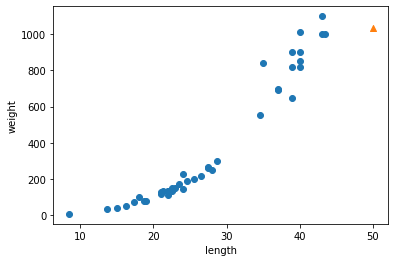

In [8]:
import matplotlib.pyplot as plt

plt.scatter(train_input, train_target)
plt.scatter(50, knr.predict([[50]]), marker='^')
plt.xlabel("length")
plt.ylabel("weight")

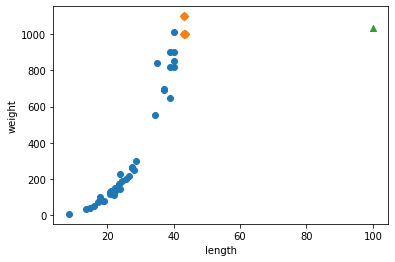

In [11]:
distances, indexes = knr.kneighbors([[100]])

plt.scatter(train_input, train_target)
plt.scatter(train_input[indexes], train_target[indexes], marker='D')
plt.scatter(100, knr.predict([[100]]), marker='^')
plt.xlabel("length")
plt.ylabel("weight")
plt.show()

In [12]:
print(np.mean(train_input[indexes]))

43.166666666666664


[1185.28678066]
[35.97080088] -613.2532631977041


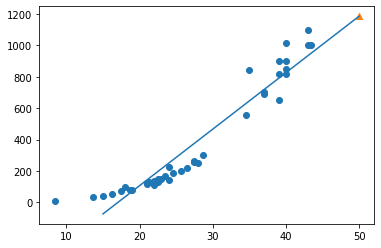

In [16]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()

lr.fit(train_input, train_target)

print(lr.predict([[50]]))
print(lr.coef_, lr.intercept_)

plt.scatter(train_input, train_target)
plt.plot([15, 50], [15*lr.coef_ + lr.intercept_, 50*lr.coef_ + lr.intercept_])

plt.scatter(50, lr.predict([[50]]), marker='^')

In [17]:
print(lr.score(train_input, train_target))
print(lr.score(test_input, test_target))

0.9135582732442973
0.9316816250335678


In [25]:
# train, test 91점 93점은 그렇게 높은 모델이 아니야...!!!
"""
## 다항 회귀
선형으로 가면 음수로 가거나, 정확도가 떨어지는 문제가 있음! 해결하기 위해 x 변수를 2차식까지 확대할거야
** 근데 주의사항 : x^2 이 변수로 온다고 해서, 그게 선형회귀가 아닌건 아니야! x^2 도 y라는 변수로 치환하면 그냥 선형회귀이니까..
"""

train_poly = np.column_stack((train_input**2, train_input))
test_poly = np.column_stack((test_input**2, test_input))

print(train_poly.shape, test_poly.shape)

(42, 2) (14, 2)


In [27]:
lr = LinearRegression()
lr.fit(train_poly, train_target)
print(lr.predict([[50**2, 50]]))
print(lr.coef_, lr.intercept_)

[1564.84371504]
[  1.0271725  -22.86983173] 140.40405778738943


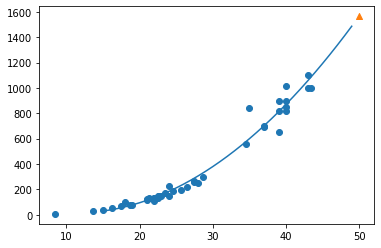

In [28]:
point = np.arange(15,50)
plt.scatter(train_input, train_target)
plt.plot(point, lr.coef_[0]*point**2 + lr.coef_[1]*point + lr.intercept_)
plt.scatter([50], lr.predict([[50**2, 50]]), marker='^')
plt.show()

In [29]:
print(lr.score(train_poly, train_target))
print(lr.score(test_poly, test_target))

0.9713519771571487
0.9765417842043891
